# **Name: Rian Renold Dbritto**

# **NUID: 002026598**

**U.S. Housing Market Time Series Project**

In [4]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Importing all important libraries

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Detecting the environment

In [34]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print(f"Running in Google Colab: {IN_COLAB}")


Running in Google Colab: False


Defining file loading logic

In [ ]:
def load_csv_files():
    """
    Loads MSPUS, MORTGAGE30US, and HOUST datasets.
    Handles both VS Code and Colab environments automatically.
    """
    if IN_COLAB:
        from google.colab import files, drive

        # Option 1: Try mounting Google Drive
        print("Would you like to load from Google Drive or upload manually?")
        print("Type 'drive' to mount Google Drive or 'upload' to manually upload files.")
        choice = input("Enter choice (drive/upload): ").strip().lower()

        if choice == "drive":
            drive.mount('/content/drive')
            path = input("Enter the path inside Drive (e.g. /content/drive/MyDrive/assignment02/): ").strip()
        else:
            uploaded = files.upload()
            path = "/content/"  # Colab stores uploaded files here

    else:
        # Local path for VS Code / Desktop
        path = "/Users/rian27/Desktop/compviz assignmet/assignment 02/"
        print(f"📁 Using local path: {path}")

    # Load the CSVs
    try:
        prices = pd.read_csv(os.path.join(path, "MSPUS.csv"))
    except FileNotFoundError:
        prices = pd.read_csv(os.path.join(path, "MSPUS (1).csv"))

    try:
        mortgage = pd.read_csv(os.path.join(path, "MORTGAGE30US.csv"))
    except FileNotFoundError:
        mortgage = pd.read_csv(os.path.join(path, "MORTGAGE30US (1).csv"))

    housing = pd.read_csv(os.path.join(path, "HOUST.csv"))

    return prices, mortgage, housing

Running in Google Colab: False
📁 Using local path: /Users/rian27/Desktop/compviz assignmet/assignment 02/
✅ Data loaded and merged successfully!
                  Median_Home_Price  Mortgage_Rate  Housing_Starts
observation_date                                                  
2009-10-01                 219000.0           4.94           534.0
2010-04-01                 219500.0           5.08           687.0
2010-07-01                 224100.0           4.58           546.0
2015-10-01                 302500.0           3.85          1058.0
2020-10-01                 338600.0           2.88          1543.0


Load the data

In [35]:
prices, mortgage, housing = load_csv_files()

📁 Using local path: /Users/rian27/Desktop/compviz assignmet/assignment 02/


Cleaning and combining data

In [36]:
def clean_fred(df):
    """Converts date column to datetime and sets it as index."""
    date_col = [c for c in df.columns if 'date' in c.lower()][0]
    df[date_col] = pd.to_datetime(df[date_col])
    df.set_index(date_col, inplace=True)
    return df

prices = clean_fred(prices)
mortgage = clean_fred(mortgage)
housing = clean_fred(housing)

prices.columns = ["Median_Home_Price"]
mortgage.columns = ["Mortgage_Rate"]
housing.columns = ["Housing_Starts"]

df = pd.concat([prices, mortgage, housing], axis=1).dropna()

print("✅ Data loaded and merged successfully!")
print(df.head())

✅ Data loaded and merged successfully!
                  Median_Home_Price  Mortgage_Rate  Housing_Starts
observation_date                                                  
2009-10-01                 219000.0           4.94           534.0
2010-04-01                 219500.0           5.08           687.0
2010-07-01                 224100.0           4.58           546.0
2015-10-01                 302500.0           3.85          1058.0
2020-10-01                 338600.0           2.88          1543.0


Visualization setup

In [32]:
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 6)


U.S. Median Home Prices (2005–2024)

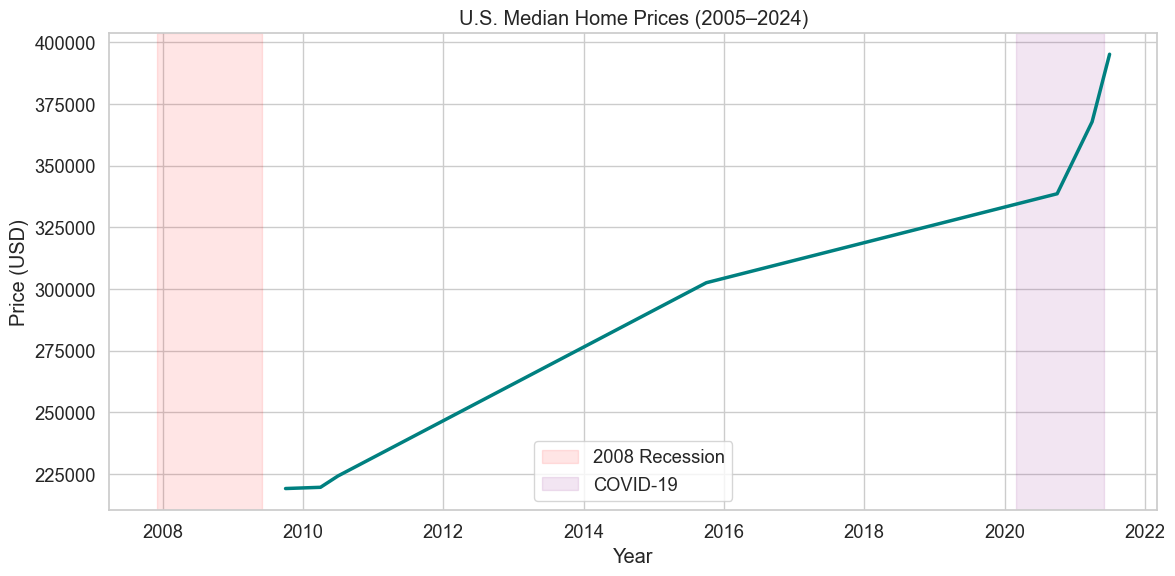

In [31]:
plt.plot(df.index, df["Median_Home_Price"], color="teal", linewidth=2.5)
plt.title("U.S. Median Home Prices (2005–2024)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.axvspan(pd.Timestamp("2007-12-01"), pd.Timestamp("2009-06-01"), color="red", alpha=0.1, label="2008 Recession")
plt.axvspan(pd.Timestamp("2020-03-01"), pd.Timestamp("2021-06-01"), color="purple", alpha=0.1, label="COVID-19")
plt.legend()
plt.tight_layout()
plt.show()

Mortgage Rates

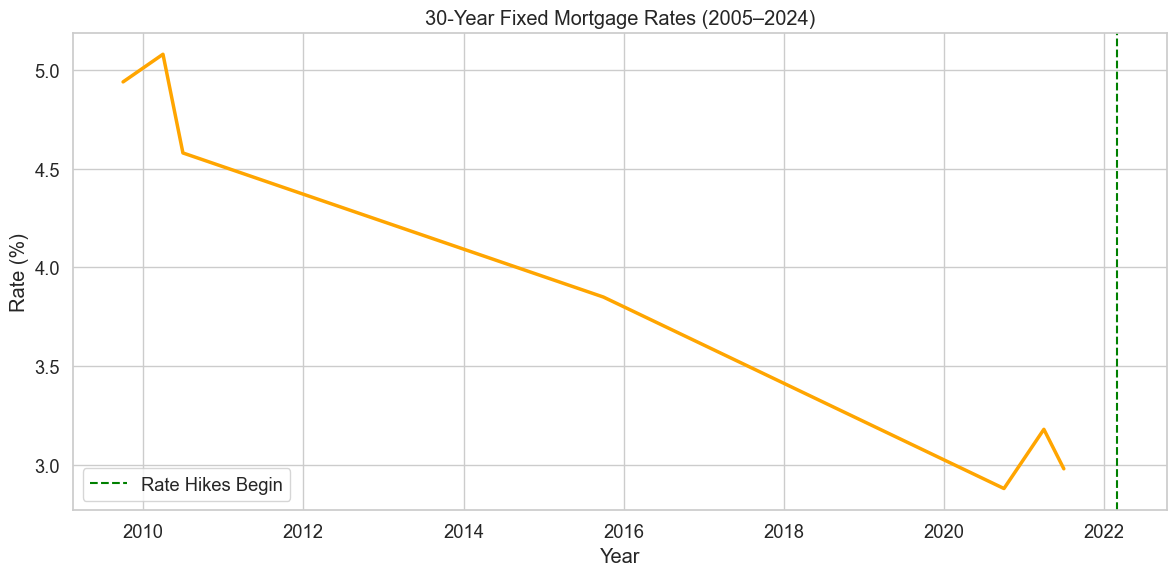

In [ ]:
plt.plot(df.index, df["Mortgage_Rate"], color="orange", linewidth=2.5)
plt.title("30-Year Fixed Mortgage Rates (2005–2024)")
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.axvline(pd.Timestamp("2022-03-01"), color="green", linestyle="--", label="Rate Hikes Begin")
plt.legend()
plt.tight_layout()
plt.show()


Housing Starts

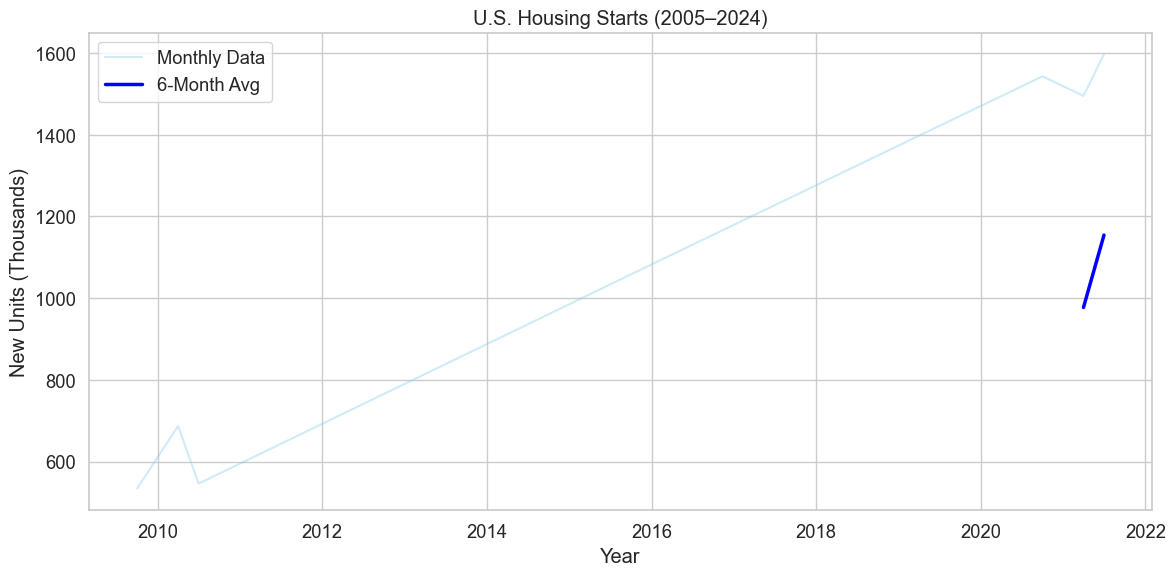

In [ ]:
df["Housing_Starts_SMA"] = df["Housing_Starts"].rolling(window=6).mean()
plt.plot(df.index, df["Housing_Starts"], color="skyblue", alpha=0.4, label="Monthly Data")
plt.plot(df.index, df["Housing_Starts_SMA"], color="blue", linewidth=2.5, label="6-Month Avg")
plt.title("U.S. Housing Starts (2005–2024)")
plt.xlabel("Year")
plt.ylabel("New Units (Thousands)")
plt.legend()
plt.tight_layout()
plt.show()

Combined Plot: Prices vs Mortgage Rates

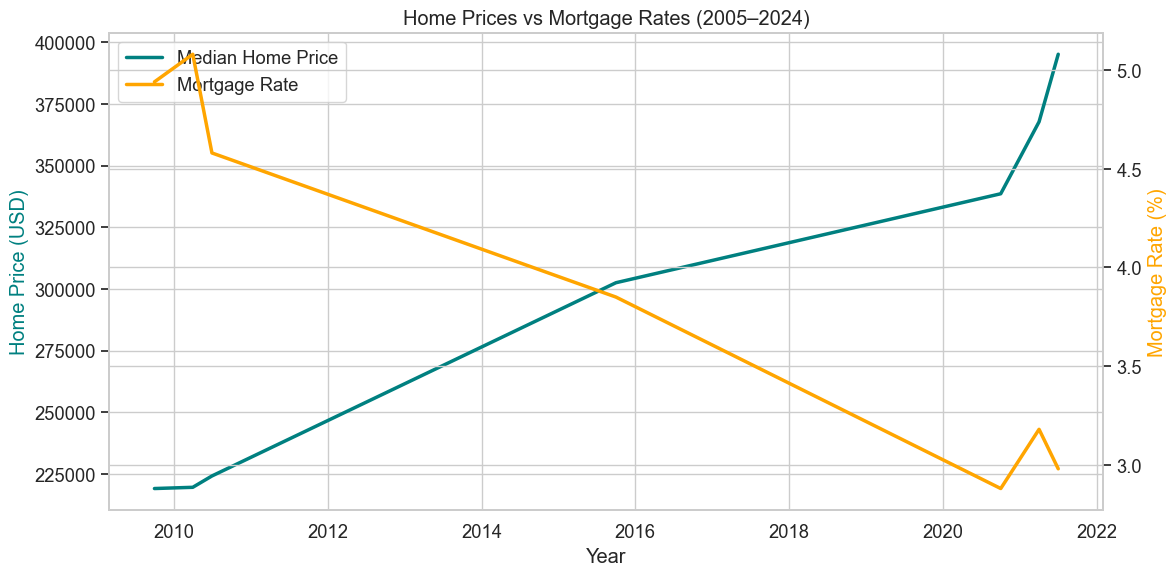

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(df.index, df["Median_Home_Price"], color="teal", linewidth=2.5, label="Median Home Price")
ax2 = ax1.twinx()
ax2.plot(df.index, df["Mortgage_Rate"], color="orange", linewidth=2.5, label="Mortgage Rate")

ax1.set_xlabel("Year")
ax1.set_ylabel("Home Price (USD)", color="teal")
ax2.set_ylabel("Mortgage Rate (%)", color="orange")
plt.title("Home Prices vs Mortgage Rates (2005–2024)")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")
plt.tight_layout()
plt.show()


Saving the combined dataset

In [ ]:
df.to_csv("Combined_Housing_Data.csv")
print("📁 Saved clean dataset as Combined_Housing_Data.csv")

📁 Saved clean dataset as Combined_Housing_Data.csv
